In [ ]:
![OriginalLogo.jpg]

"[OriginalLogo.jpg]" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###MODELO DE REGRESIÓN LINEAL(MRLG) Y ESTIMACIÓN MÍNIMOS CUADRADOS ORDINARIOS (MCO)

Estamos viendo el modelo de regresión lineal general (MRLG) y hemos descrito el proceso de estimación de sus coeficientes B, mediante Mínimos Cuadrados Ordinarios (MCO).

Ya hemos visto el modelo de regresión general y analizado los coeficientes del model, los cuales tienen un papel primordial en el MRLG.

En el modelo de regresión lineal se requieren unos supuestos básicos para poder llevar a cabo un análisi correcto. Estos supuestos son:

**S1: Supuesto de linealidad**: Nos referimos a la linealidad con respecto a los coeficientes B0, B1, B2...Bk, y no con respecto a las variables.

**S2: La muestra tomada debe ser una muestra aleatoria** qeu sigue el modelo de regresión lineal.

**S3: No existe multicolinealidad.** No existen relaciones lineales exactas entre las variables regresoras. Tampoco puede ocurrir que alguna de las variables regresoras sea constante. Es decir, X es de rango completo.

**S4: Independencia y normalidad de los errores. **

**S5: Homocedasticidad y ausencia de correlación serial:** La varianza del error es constante para todos los variables de la muestra.

Para verificar los supuestos de la Regresión Lineal Simple (MRL), existen varias pruebas y métodos gráficos que permiten evaluar cada supuesto:

Para verificar los supuestos de la Regresión Lineal Simple (MRL), existen varias pruebas y métodos gráficos que permiten evaluar cada supuesto. Aquí te detallo las más comunes:

In [ ]:
pip install numpy pandas statsmodels matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install -c anaconda scipy


Note: you may need to restart the kernel to use updated packages.


###Instalamos las librerias necesarias

In [ ]:
import numpy as np  # Biblioteca para cálculos numéricos y manejo de arreglos de datos
import pandas as pd  # Herramienta para manejo y análisis de datos en estructuras como DataFrames
import matplotlib.pyplot as plt  # Biblioteca de gráficos para visualización de datos (2D)
import seaborn as sns  # Biblioteca de visualización basada en Matplotlib con funciones para gráficos estadísticos
import statsmodels.api as sm  # Biblioteca para análisis estadístico, incluyendo modelos de regresión
from statsmodels.formula.api import ols  # Función específica de Statsmodels para realizar regresiones lineales usando fórmulas
from scipy.stats import shapiro, kstest, normaltest, jarque_bera  # Pruebas estadísticas para evaluar la normalidad de los datos




# Generar datos de ejemplo

In [ ]:
# Generar datos de ejemplo
np.random.seed(0)
X = np.random.rand(100) * 10  # Variable independiente
y = 3 + 2 * X + np.random.randn(100) * 2  # Variable dependiente (con ruido)

# Crear un DataFrame para el análisis
data = pd.DataFrame({'X': X, 'Y': y})




In [ ]:
data.head()  # Muestra las primeras 5 filas del DataFrame


,X,Y
0,5.488135,11.645970
1,7.151894,19.105440
2,6.027634,15.986592
3,5.448832,10.825176
4,4.236548,14.449600


In [ ]:
data.describe()  # Muestra estadísticas básicas como media, desviación estándar, min, max, etc.


,X,Y
count,100.000000,100.000000
mean,4.727938,12.840545
std,2.897540,6.096767
min,0.046955,1.789268
25%,2.058032,7.306228
50%,4.674810,12.991166
75%,6.844833,17.349413
max,9.883738,26.338668


In [ ]:
print(data)  # Muestra todo el DataFrame


           X          Y
0   5.488135  11.645970
1   7.151894  19.105440
2   6.027634  15.986592
3   5.448832  10.825176
4   4.236548  14.449600
..       ...        ...
95  1.831914   8.027016
96  5.865129  13.123439
97  0.201075   2.023051
98  8.289400  18.667736
99  0.046955   3.128868

[100 rows x 2 columns]


In [ ]:
data.info()  # Muestra los tipos de datos y la cantidad de valores no nulos en cada columna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
data.tail()  # Muestra las últimas 5 filas del DataFrame


,X,Y
95,1.831914,8.027016
96,5.865129,13.123439
97,0.201075,2.023051
98,8.289400,18.667736
99,0.046955,3.128868


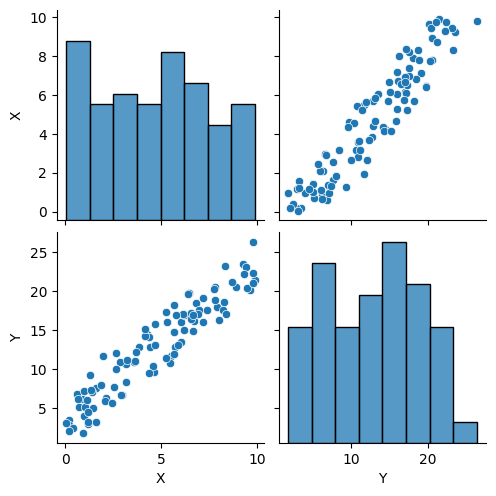

In [ ]:
sns.pairplot(data)  # Visualiza distribuciones y relaciones entre las variables en el DataFrame
plt.show()


# Ajustar el modelo de Regresión Lineal

In [ ]:

model = ols('Y ~ X', data).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.49e-49
Time:                        11:36:44   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4443      0.387      8.910      0.0

# Obtener los residuos y los valores ajustados


In [ ]:
residuos = model.resid
valores_ajustados = model.fittedvalues

### S1.-Prueba de linealidad

### Gráfico de dispersión(Scatter plot)


Traza un gráfico de dispersión entre la variable dependiente ( Y ) y la independiente ( X ). Si los puntos se distribuyen en torno a una línea recta, esto sugiere que el supuesto de linealidad es razonable.



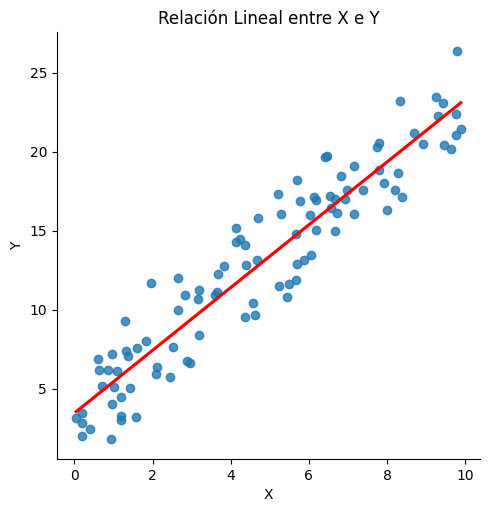

In [ ]:

# Gráfico de dispersión con línea de regresión
sns.lmplot(x='X', y='Y', data=data, ci=None, line_kws={'color': 'red'})
plt.title('Relación Lineal entre X e Y')
plt.show()


### S2.- Muestra Aleatoria que Sigue el Modelo de Regresión Lineal


Este supuesto implica que la muestra utilizada debe ser representativa de la población y debe haber sido tomada de forma aleatoria. Esto no se puede verificar directamente en Python, pero es importante tener en cuenta cómo se selecciona la muestra para garantizar resultados válidos.

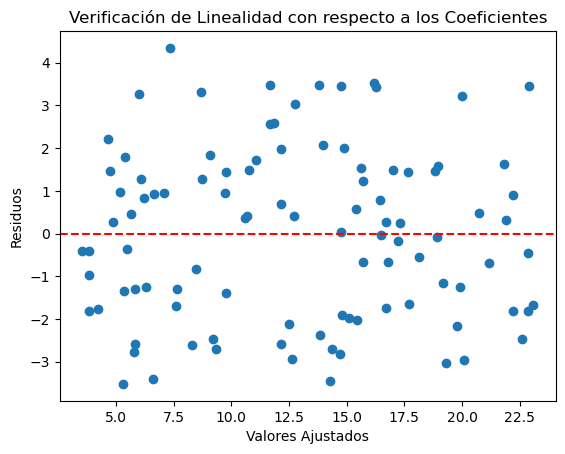

### S3.- No Existe Multicolinealidad (las variables son de rango completo)


La multicolinealidad ocurre cuando existen relaciones lineales fuertes entre las variables independientes. Este problema es exclusivo de la Regresión Lineal Múltiple y puede hacer que los coeficientes no se estimen de forma confiable.

Verificación en Python:
Para verificar la multicolinealidad, utilizamos el Factor de Inflación de la Varianza (VIF). Si el VIF de alguna variable es mayor a 10, es indicativo de multicolinealidad.
python

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor




## Calcular VIF para cada variable independiente

In [ ]:
# Calcular VIF para cada variable independiente
variables_independientes = model.model.exog
vif = [variance_inflation_factor(variables_independientes, i) for i in range(variables_independientes.shape[1])]
print(vif)  # Valores de VIF para cada variable

[3.6893634470415524, 1.0]


### S4.- independencia de los errores

##Durbin-Watson Test


Para verificar la independencia de los errores, utilizamos el Durbin-Watson Test.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson Test
dw_statistic = durbin_watson(residuos)
print(f'Estadístico de Durbin-Watson: {dw_statistic:.2f}')



Estadístico de Durbin-Watson: 2.08


###S4. Normalidad de los Errores

In [ ]:

Para verificar la normalidad, realizamos un histograma, un gráfico Q-Q y la prueba de Shapiro-Wilk.

###Histograma de los residuosylabel('Frecuencia')


In [ ]:
# Histograma de los residuosylabel('Frecuencia')
plt.show()




### Gráfico Q-Q de los residuos

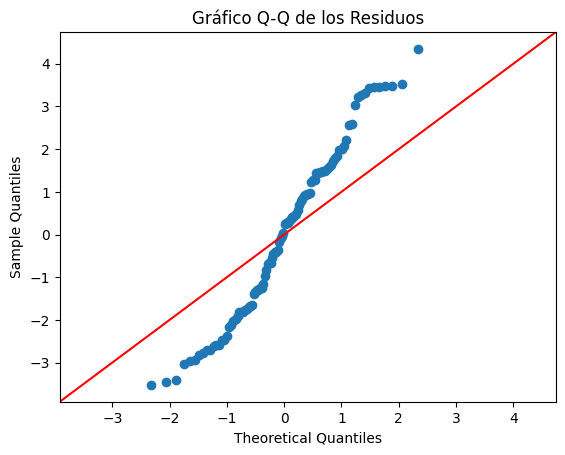

In [ ]:

sm.qqplot(residuos, line='45')
plt.title('Gráfico Q-Q de los Residuos')
plt.show()



### Prueba de Shapiro-Wilk para normalidad

In [ ]:

shapiro_test = shapiro(residuos)
print(f'Shapiro-Wilk p-valor: {shapiro_test.pvalue:.4f}')

Shapiro-Wilk p-valor: 0.0137


Si el p-valor de Shapiro-Wilk es mayor a 0.05, podemos asumir que los residuos siguen una distribución normal. en nuestro caso, dicha normalidad no existe.

### Prueba de Anderson-Darling
Esta prueba también evalúa la normalidad de los residuos, y es más sensible a las colas de la distribución.

In [ ]:
from scipy.stats import anderson

# Realizar la prueba de Anderson-Darling
anderson_result = anderson(residuos)

# Resultados de la prueba
print('\nPrueba de Anderson-Darling:')
print(f'Estadístico: {anderson_result.statistic:.4f}')
for i in range(len(anderson_result.critical_values)):
    print(f'Valor crítico (alfa={anderson_result.significance_level[i]}): {anderson_result.critical_values[i]:.4f}')
    if anderson_result.statistic < anderson_result.critical_values[i]:
        print('No se puede rechazar la hipótesis nula: los residuos siguen una distribución normal.')
    else:
        print('Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.')



Prueba de Anderson-Darling:
Estadístico: 0.8329
Valor crítico (alfa=15.0): 0.5550
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.
Valor crítico (alfa=10.0): 0.6320
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.
Valor crítico (alfa=5.0): 0.7590
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.
Valor crítico (alfa=2.5): 0.8850
No se puede rechazar la hipótesis nula: los residuos siguen una distribución normal.
Valor crítico (alfa=1.0): 1.0530
No se puede rechazar la hipótesis nula: los residuos siguen una distribución normal.


###S5.- Homocedasticidad

# Calcular VIF para cada variable independiente
variables_independientes = model.model.exog
vif = [variance_inflation_factor(variables_independientes, i) for i in range(variables_independientes.shape[1])]
print(vif)  # Valores de VIF para cada variable

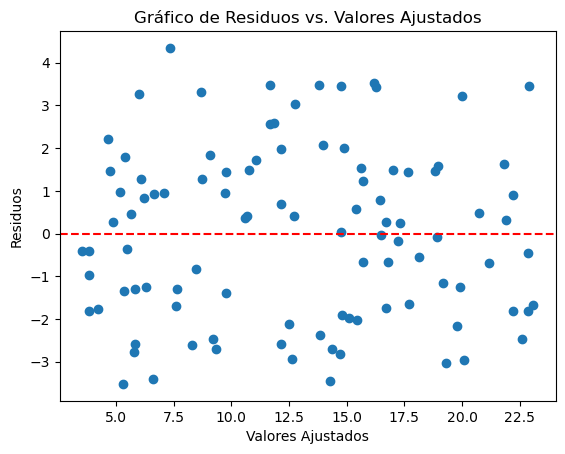

Breusch-Pagan p-valor: 0.8455


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Gráfico de Residuos vs. Valores Ajustados
plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.show()

# Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, model.model.exog)
print(f'Breusch-Pagan p-valor: {bp_test[1]:.4f}')


In [ ]:
Si el p-valor de Breusch-Pagan es bajo (p < 0.05), sugiere heterocedasticidad (varianza no constante). En nuestro caso, sí que podemos hablar de
homocedasticidad.

### Interpretación de Resultados

In [ ]:

S1. **Linealidad**: El gráfico de dispersión entre `X` y `Y` debe mostrar una línea recta clara.
S2: **Muestra Aleatoria que Sigue el Modelo de Regresión Lineal**
Este supuesto implica que la muestra utilizada debe ser representativa de la población y debe haber sido tomada de forma aleatoria.
Esto no se puede verificar directamente en Python, pero es importante tener en cuenta cómo se selecciona la muestra para garantizar resultados válidos.
S4. **Independencia de los errores**: Un valor de **Durbin-Watson** cercano a 2 confirma que no hay autocorrelación.
S4. **Normalidad de los errores**: El histograma, el gráfico Q-Q, y un p-valor alto en Shapiro-Wilk indicarían normalidad.
S5. **Homocedasticidad**: El gráfico de residuos debería mostrar una dispersión aleatoria y constante. Un p-valor bajo en Breusch-Pagan indicaría heterocedasticidad.